## Imports

In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from nxviz import ArcPlot
import matplotlib as mpl
import matplotlib.pyplot as plt
import json

%matplotlib inline

## Custom Methods

In [2]:
def show_the_dag(dag, weighted_edges=False, edge_labels=False):
    """Show the dag in a vertical layout."""
    options = {
        'node_color': 'red',
        'edge_color': 'blue',
        'arrowstyle': '-|>',
        'arrowsize': 12,
        'font_color': 'black',
    }
    write_dot(dag, 'tmp.dot')
    pos = graphviz_layout(dag, prog='dot')
    nx.draw(dag, pos, arrows=True, with_labels=True, **options)
    if weighted_edges and edge_labels:
        labels = nx.get_edge_attributes(dag,'weight')
        nx.draw_networkx_edge_labels(dag, pos, edge_labels=labels)
    plt.show()

In [3]:
def show_dag_data(dag):
    """Show the data from the dag in a nice layout."""
    graph_dict = dict(dag.nodes(data=True))
    print(json.dumps(graph_dict, sort_keys=False, indent=2))

## Create a simple dag

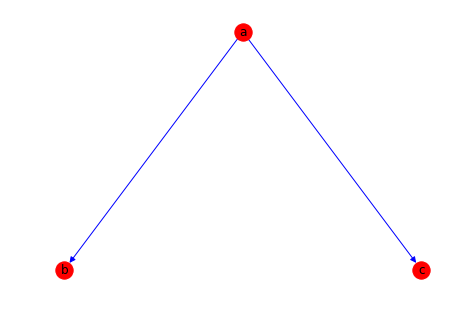

In [4]:
g = nx.DiGraph()
g.add_nodes_from(["a", "b", "c"])
g.add_edges_from([("a", "b"), ("a", "c")])
show_the_dag(g)

In [5]:
# Is this really a dag?
nx.is_directed_acyclic_graph(g)

True

In [6]:
G = nx.DiGraph(day="Friday")
G.graph

{'day': 'Friday'}

## Create a dag with data

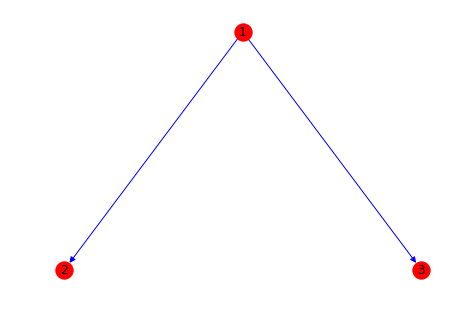

In [7]:
G = nx.DiGraph()
G.add_node(1, time='5pm')
G.add_nodes_from([2, 3], time='2pm')
G.add_edges_from([(1, 2), (1, 3)])
show_the_dag(G)

In [8]:
# For more DAG algos: https://networkx.github.io/documentation/latest/reference/algorithms/dag.html
nx.dag.ancestors(G, 2)

{1}

In [9]:
show_dag_data(G)

{
  "1": {
    "time": "5pm"
  },
  "2": {
    "time": "2pm"
  },
  "3": {
    "time": "2pm"
  }
}


In [10]:
G.node[1]['room'] = 714
show_dag_data(G)

{
  "1": {
    "time": "5pm",
    "room": 714
  },
  "2": {
    "time": "2pm"
  },
  "3": {
    "time": "2pm"
  }
}


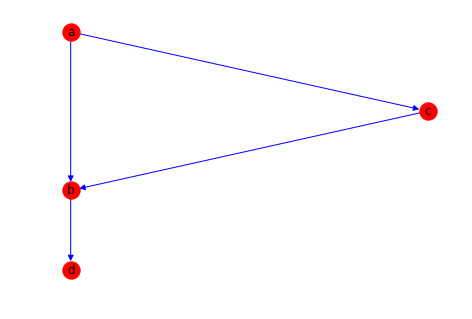

In [11]:
dag_nodes = {
    'a': ['b', 'c'],
    'b': ['d'],
    'c': ['b'],
    'd': []
}

G = nx.DiGraph(dag_nodes)

show_the_dag(G)

## Create a dag with more nodes

/anaconda3/envs/py37/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


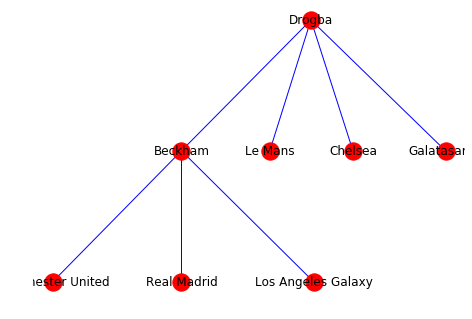

In [12]:
d = {'Drogba': ['Beckham', 'Le Mans', 'Chelsea', 'Galatasaray'], 'Beckham': ['Manchester United', 'Real Madrid', 'Los Angeles Galaxy']}
g = nx.Graph(d)
show_the_dag(g)

## Create a dag with more connections

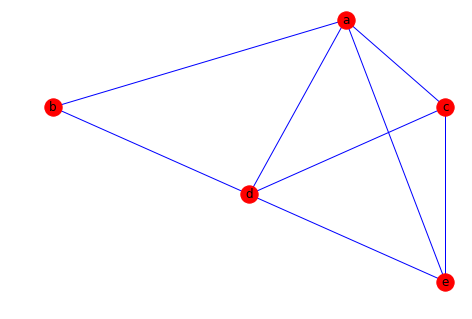

In [13]:
dag_nodes = {
    'a': ['b', 'c', 'd', 'e'],
    'b': ['d'],
    'c': ['d', 'e'],
    'd': ['e'],
    'e': []
}
g = nx.Graph(dag_nodes)
show_the_dag(g)

## Plot a dag with an ArcPlot

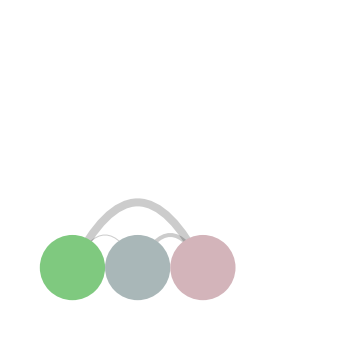

In [14]:
G = nx.DiGraph()

# nodex
NODES_EBUNCH = [
    ("A", {"n_visitors": 1}),
    ("B", {"n_visitors": 4}),
    ("C", {"n_visitors": 20}),
]

G.add_nodes_from(NODES_EBUNCH)

# edges
EDGES_EBUNCH = [("A", "B", 1), ("A", "C", 8), ("B", "C", 4)]

G.add_weighted_edges_from(EDGES_EBUNCH)

edges = G.edges()

# ArcPlot
c = ArcPlot(
    G,
    node_labels=True,
    node_size="n_visitors",
    node_color="n_visitors",
    edge_width="weight",
)

c.draw()
plt.show()

In [15]:
show_dag_data(G)

{
  "A": {
    "n_visitors": 1
  },
  "B": {
    "n_visitors": 4
  },
  "C": {
    "n_visitors": 20
  }
}


In [16]:
labels = nx.get_edge_attributes(G,'weight')
print(labels)

{('A', 'B'): 1, ('A', 'C'): 8, ('B', 'C'): 4}


In [17]:
nx.dag.is_directed_acyclic_graph(G)

True

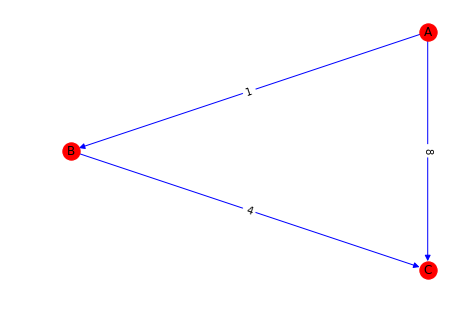

In [18]:
show_the_dag(G, weighted_edges=True, edge_labels=True)